In [48]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import utils.boxes as box_utils
from matplotlib.collections import PatchCollection
import matplotlib.patches as patches
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [9]:
dataDir='../lib/datasets/data/ucf101'
dataType='train1'
annFile='{}/detection/instances_{}_ucf101.json'.format(dataDir,dataType)

In [10]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=5.37s)
creating index...
index created!


In [13]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

COCO categories: 
Basketball BasketballDunk Biking CliffDiving CricketBowling Diving Fencing FloorGymnastics GolfSwing HorseRiding IceDancing LongJump PoleVault RopeClimbing SalsaSpin SkateBoarding Skiing Skijet SoccerJuggling Surfing TennisSwing TrampolineJumping VolleyballSpiking WalkingWithDog



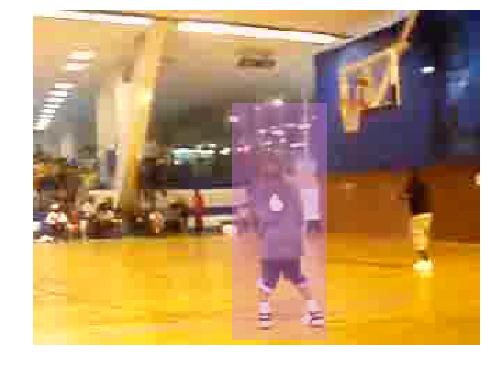

In [96]:
# get all images containing given categories, select one at random
catId = coco.getCatIds(catNms=['Basketball'])[0];
imgIds = coco.catToImgs[catId]
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

# load and display image
I = io.imread(dataDir + '/images/'+ img['file_name'])
plt.axis('off')
plt.imshow(I)

# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
polygons = []
color = []

ax = plt.gca()
ax.set_autoscale_on(False)
for ann in anns:
    x1, y1, w, h = ann['bbox']
    polygons.append(patches.Rectangle((x1,y1),w,h,linewidth=1,edgecolor='r',facecolor='none'))
    color.append((np.random.random((1, 3))*0.6+0.4).tolist()[0])
p = PatchCollection(polygons, facecolor=color, linewidths=0, alpha=0.4)
ax.add_collection(p);
plt.show()